In [70]:
import numpy as np
import pandas as pd
from bitalg.tests.test2 import Test
from bitalg.visualizer.main import Visualizer
import random
import copy
import time
import functools
import pygame
import csv
import decimal
decimal.getcontext().prec = 64
vis = Visualizer()

In [81]:
def generate_uniform_points(left=-100, right=100, n=100):
    random.seed()
    points = set()
    for i in range(n):
        while True:
            x = random.uniform(left,right)
            y = random.uniform(left,right)
            new_point = (x,y)
            if new_point not in points:
                points.add(new_point)
                break
    return list(points)

In [82]:
def orient (a,b,c):
    # Występuje tu zamiana typu danych na dokładność do 64 liczb miejsc po przecinku
    eps=1e-30
    new_a=(decimal.Decimal(a[0]),decimal.Decimal(a[1]))
    new_b=(decimal.Decimal(b[0]),decimal.Decimal(b[1]))
    new_c=(decimal.Decimal(c[0]),decimal.Decimal(c[1]))
    det=(new_b[0]-new_a[0])*(new_c[1]-new_b[1])-(new_b[1]-new_a[1])*(new_c[0]-new_b[0])
    if abs(det)<eps:
        return 0
    elif det>0:
        return 1
    else:
        return -1


def Get_convex_hull(P):
    convex_hull=[P[0]]
    i=1
    t=0
    while i<len(P):
        if t == 0:
            convex_hull.append(P[i])
            t+=1
            i+=1
        else:
            if orient(convex_hull[t-1],convex_hull[t],P[i])<0:
                convex_hull.append(P[i])
                t+=1
                i+=1
            else:
                convex_hull.pop()
                t-=1
    return convex_hull


def andrews_monotone_chain_algorithm(Q):
    if len(Q)==0: return []
    points = sorted(Q, key = lambda point: (point[0],point[1]))
    convex_hull_upper = Get_convex_hull(points)
    points.reverse()
    convex_hull_lower = Get_convex_hull(points)
    convex_hull = convex_hull_upper
    convex_hull.pop()
    convex_hull.extend(convex_hull_lower)
    convex_hull.pop()
    return convex_hull

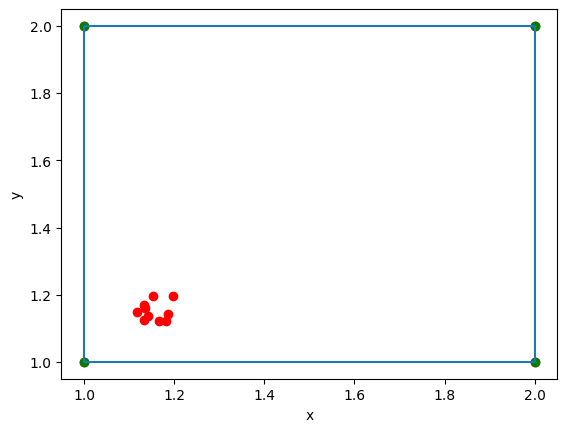

In [83]:
#Q = generate_uniform_points(n = 100)
Q=[(1,1),(1,2),(2,1),(2,2)]
Q.extend(generate_uniform_points(1.1,1.2,10))
convex_hull = andrews_monotone_chain_algorithm(Q)
vis.clear()
if len(Q)>2:
    vis.add_point(Q, color=['red'])
    vis.add_point(convex_hull, color=['green'])
    vis.add_line_segment([(convex_hull[i], convex_hull[i+1]) for i in range(len(convex_hull)-1)])
    vis.add_line_segment([convex_hull[-1], convex_hull[0]])
elif len(Q)==2:
    vis.add_point(Q, color=['green'])
    vis.add_line_segment(Q)
else:
   vis.add_point(Q, color=['green'])
vis.show()